# IMPORTS

## Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as ss

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML

from tabulate import tabulate

## Helper Functions

In [77]:
def cramerV(x, y):
    cm = pd.crosstab(x, y).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n)/(min(kcorr-1,rcorr-1)))



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 16]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [10]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [4]:
dfRaw = pd.read_csv('../../01-Data/Results/01-FirstRoundCRISP/dfFeatureEngineering.csv', low_memory=False, parse_dates=['Date'])

# EXPLORATORY DATA ANALYSIS

In [5]:
dfRaw1 = dfRaw.copy()

## Univariate Analysis

### Response Univariate

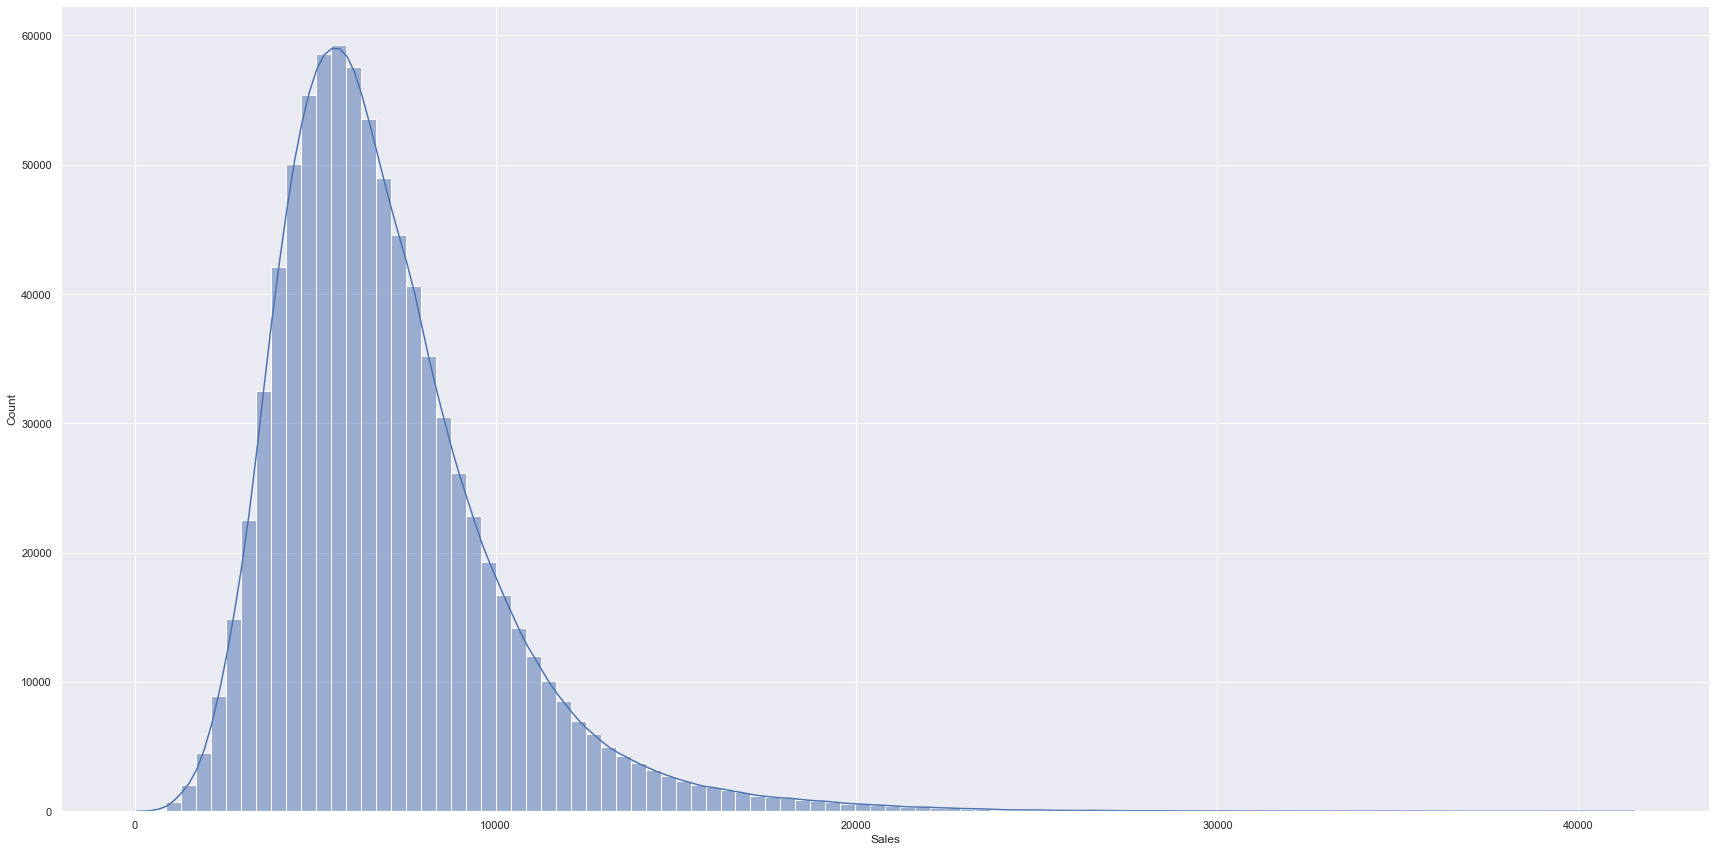

In [13]:
sns.displot(dfRaw1['Sales'], height=12, aspect=2, bins=100, kde=True)

### Numerical Variable

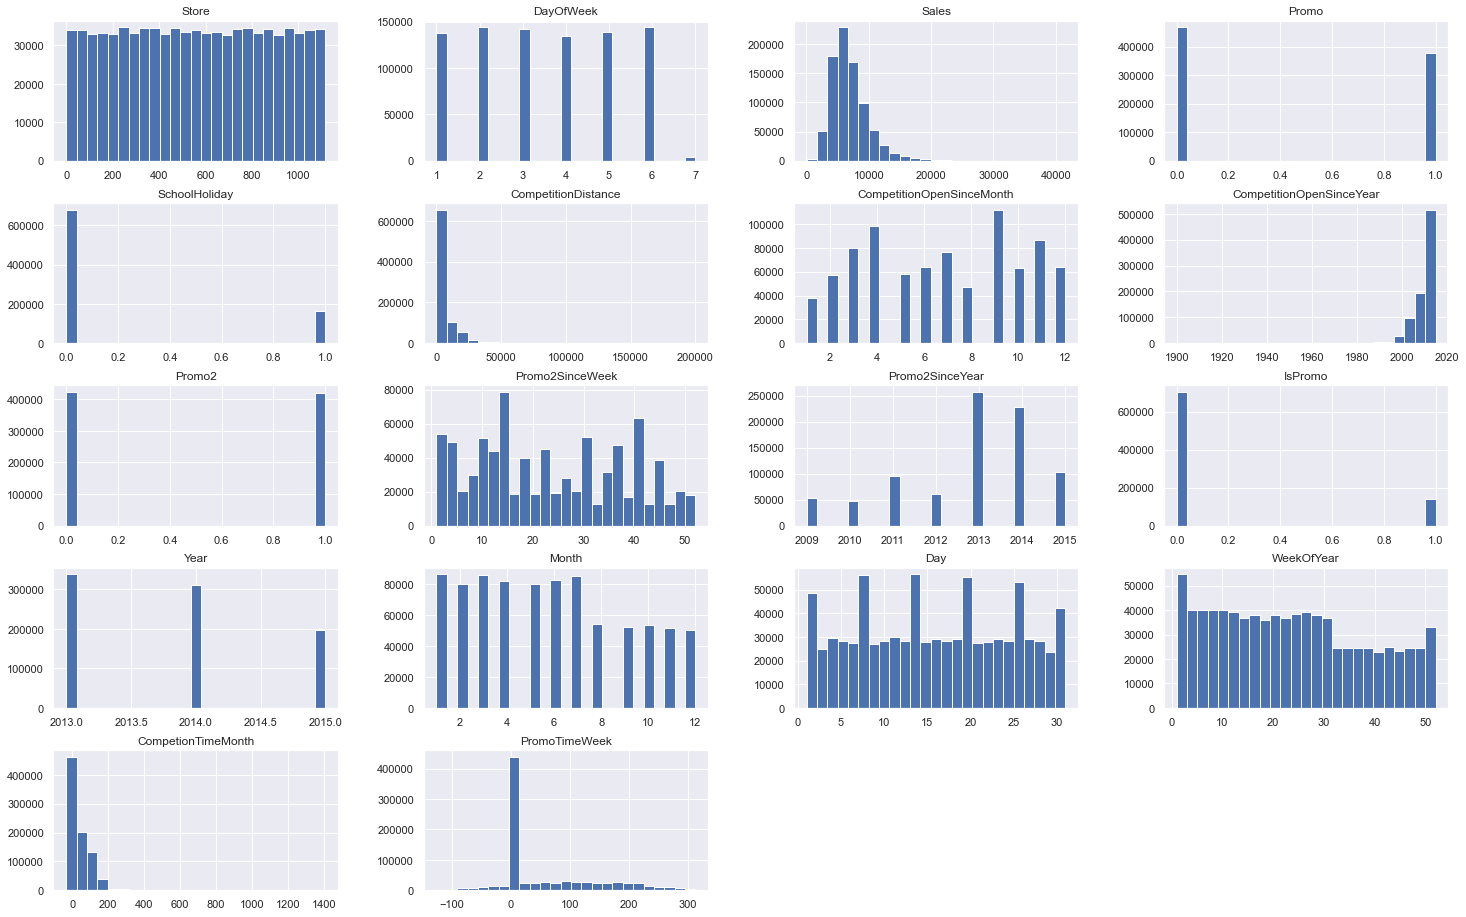

In [12]:
numAttributes = dfRaw1.select_dtypes(include=['int64', 'float64'])
#numAttributes.hist(bins=25, figsize=(20,16))
numAttributes.hist(bins=25)
plt.show()

### Categorical Variable

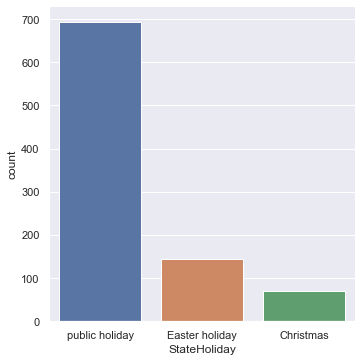

In [17]:
# State Holiday

dfRaw2 = dfRaw1[dfRaw1['StateHoliday'] != 'Regular Day']
sns.catplot(x='StateHoliday', kind='count', data=dfRaw2)
plt.show()

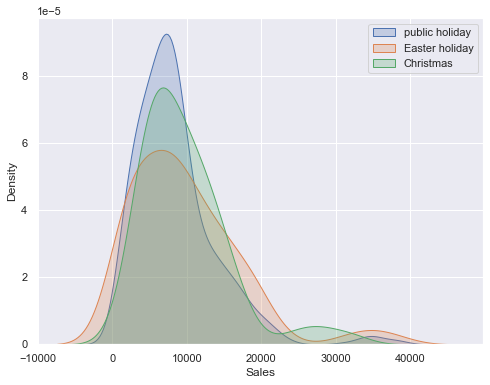

In [18]:
# State Holiday

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'public holiday']['Sales'], label='public holiday', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'Easter holiday']['Sales'], label='Easter holiday', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'Christmas']['Sales'], label='Christmas', shade=True)
plt.legend()

plt.show()

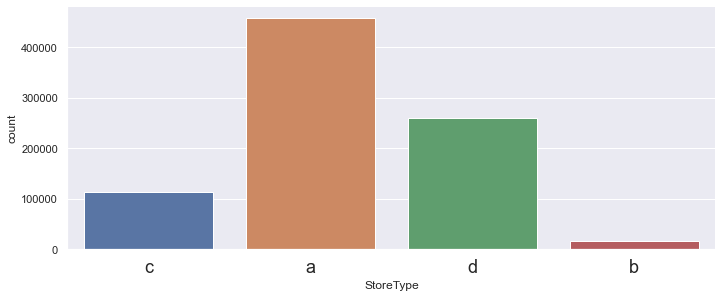

In [19]:
# Store Type

sns.catplot(x='StoreType', kind='count', data=dfRaw1, height=4, aspect=2.5)
plt.xticks(fontsize=18)
plt.show()

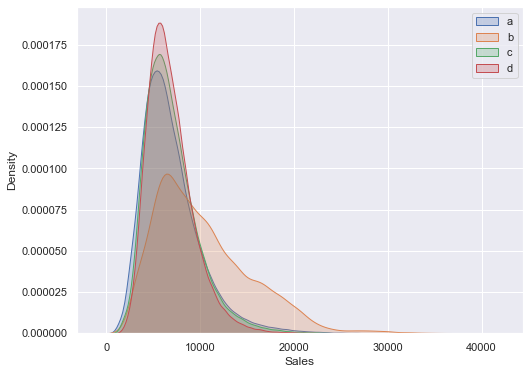

In [20]:
# Store Type

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'a']['Sales'], label='a', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'b']['Sales'], label='b', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'c']['Sales'], label='c', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'd']['Sales'], label='d', shade=True)
plt.legend()

plt.show()

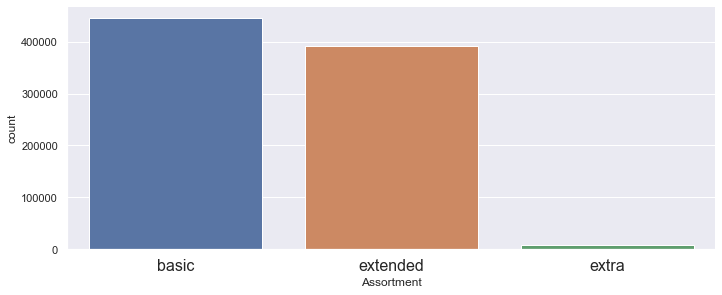

In [21]:
# Assortment

sns.catplot(x='Assortment', kind='count', data=dfRaw1, height=4, aspect=2.5)
plt.xticks(fontsize=16)
plt.show()

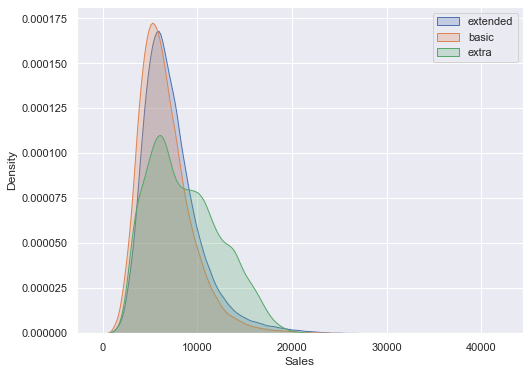

In [22]:
# Assortment

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['Assortment'] == 'extended']['Sales'], label='extended', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['Assortment'] == 'basic']['Sales'], label='basic', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['Assortment'] == 'extra']['Sales'], label='extra', shade=True)
plt.legend()

plt.show()

### Bivariate Analysis

#### H1-Stores with larger assortment should sell more
**FALSE** Stores with larger assortment sell **LESS**

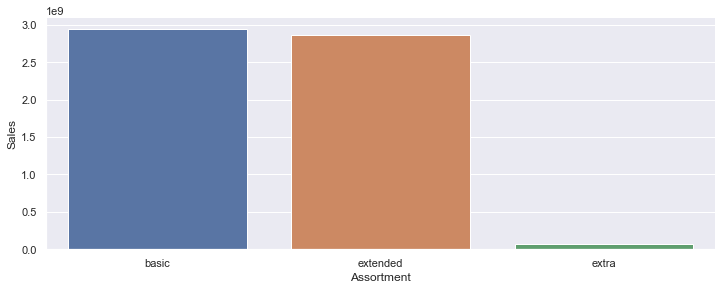

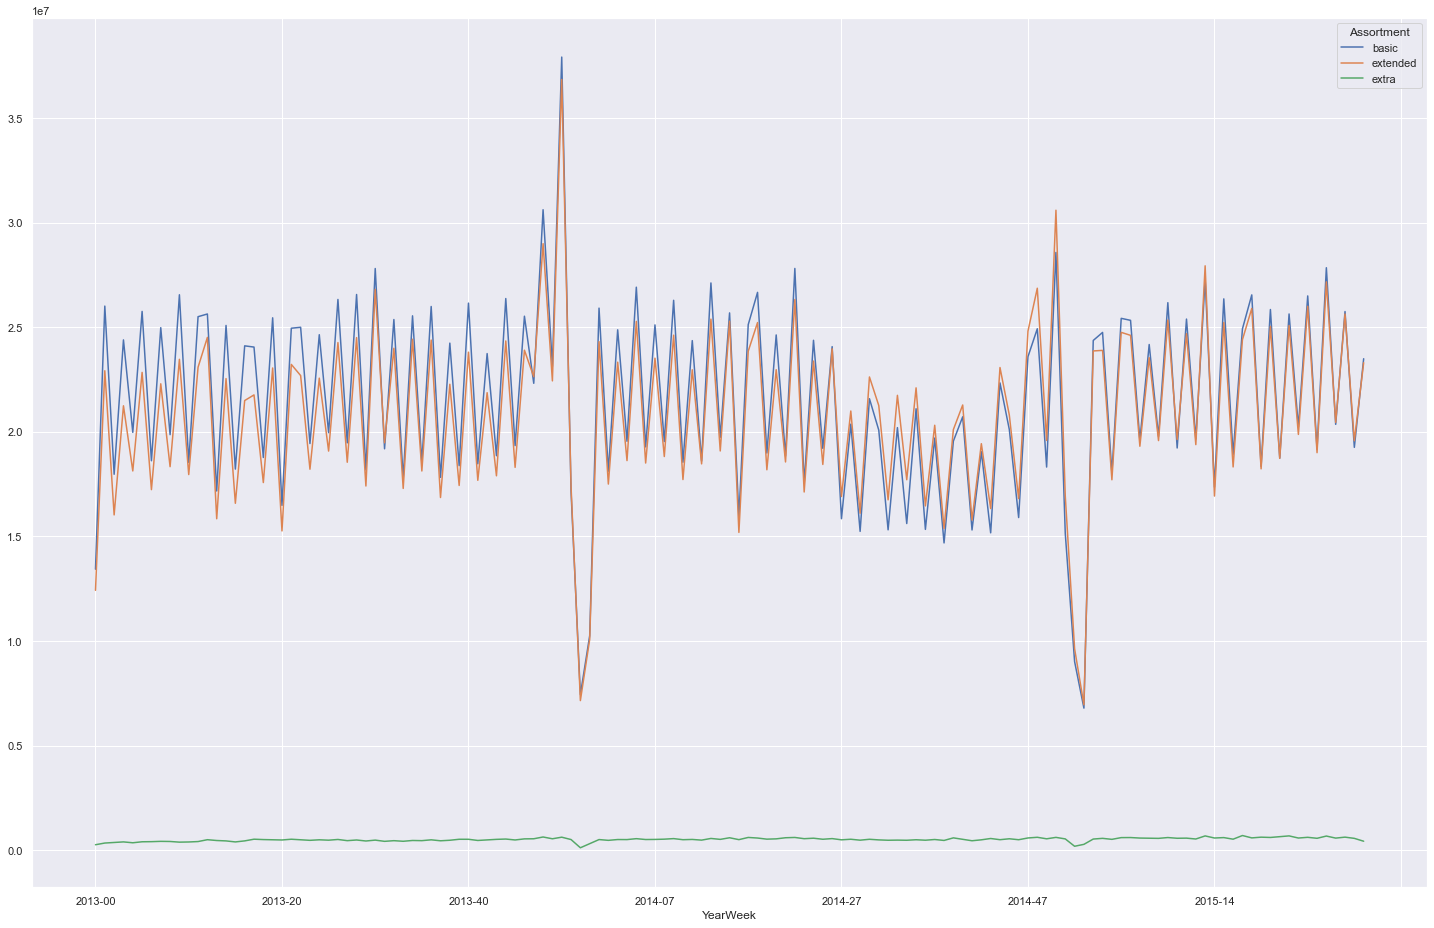

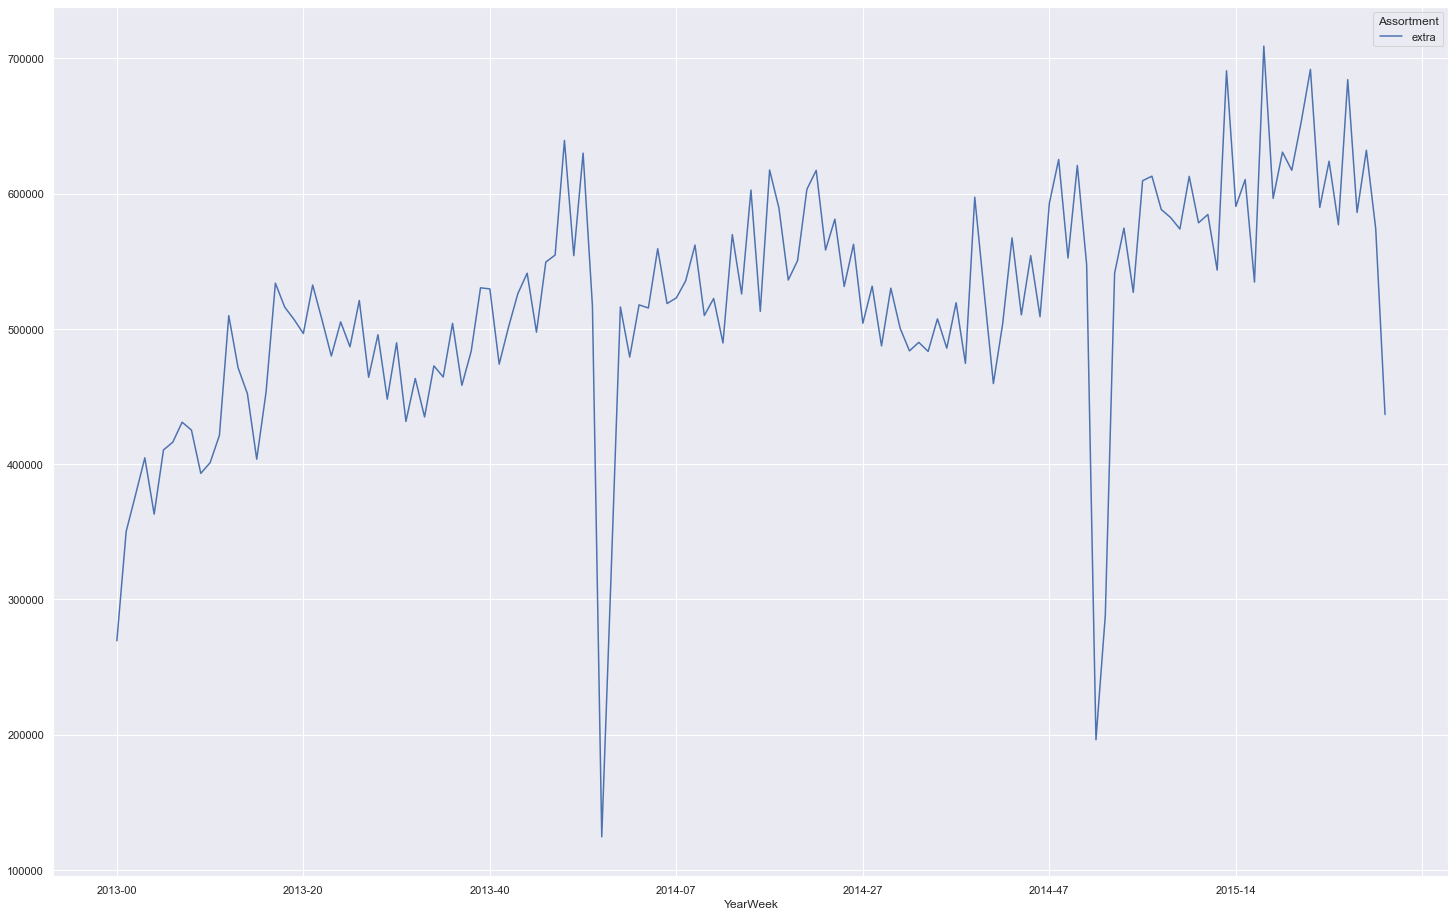

In [23]:
aux1 = dfRaw1[['Assortment', 'Sales']].groupby('Assortment').sum().reset_index()
sns.catplot(x='Assortment', y='Sales', data=aux1, kind='bar', height=4, aspect=2.5);
plt.show()


aux2 = dfRaw1[['YearWeek','Assortment', 'Sales']].groupby(['YearWeek', 'Assortment']).sum().reset_index()
aux2.pivot(index='YearWeek', columns='Assortment', values='Sales').plot()
plt.show()


aux3 = aux2[aux2['Assortment'] == 'extra']
aux3.pivot(index='YearWeek', columns='Assortment', values='Sales').plot()
plt.show()

#### H2-Stores with closer competitors should sell less
**FALSE** Stores with closer competitors sell **MORE**

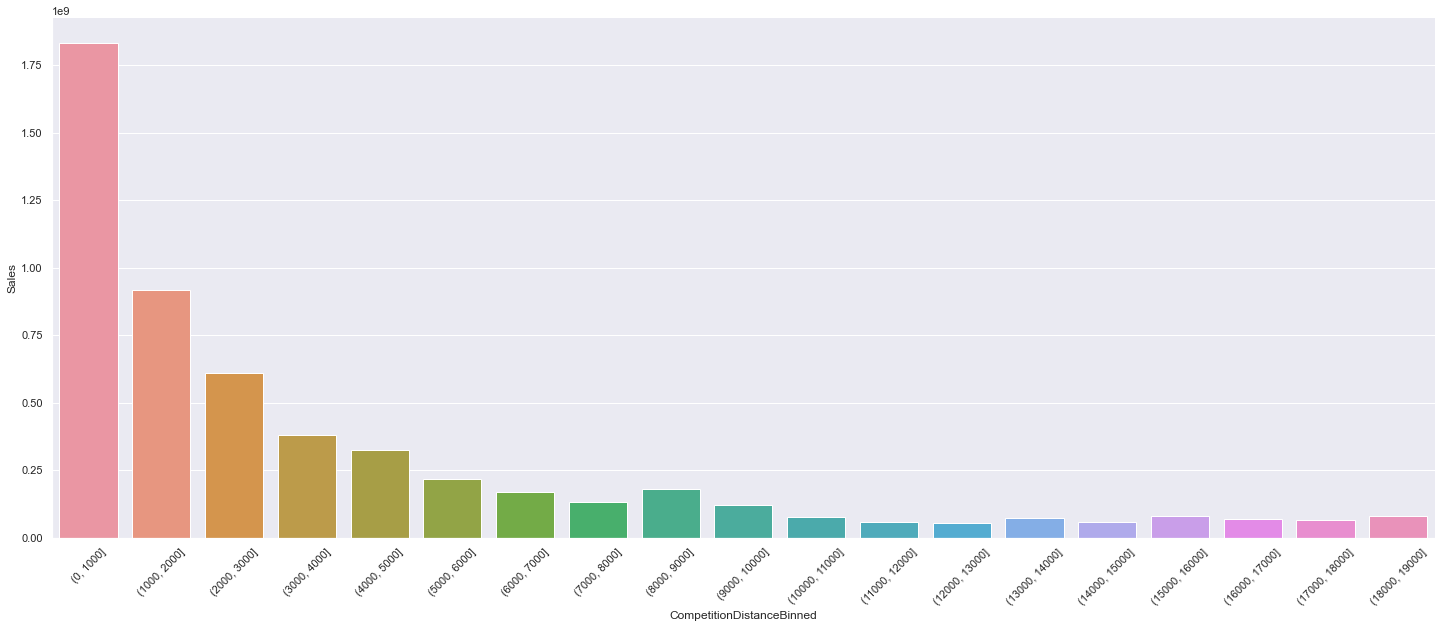

In [24]:
aux1 = dfRaw1[['CompetitionDistance', 'Sales']].groupby('CompetitionDistance').sum().reset_index()
bins = list(np.arange(0, 20000, 1000))
aux1['CompetitionDistanceBinned'] = pd.cut(aux1['CompetitionDistance'], bins=bins)
aux2 = aux1[['CompetitionDistanceBinned', 'Sales']].groupby('CompetitionDistanceBinned').sum().reset_index()
sns.catplot(x='CompetitionDistanceBinned', y='Sales', data=aux2, kind='bar', height=8, aspect=2.5);
plt.xticks(rotation=45)
plt.show()

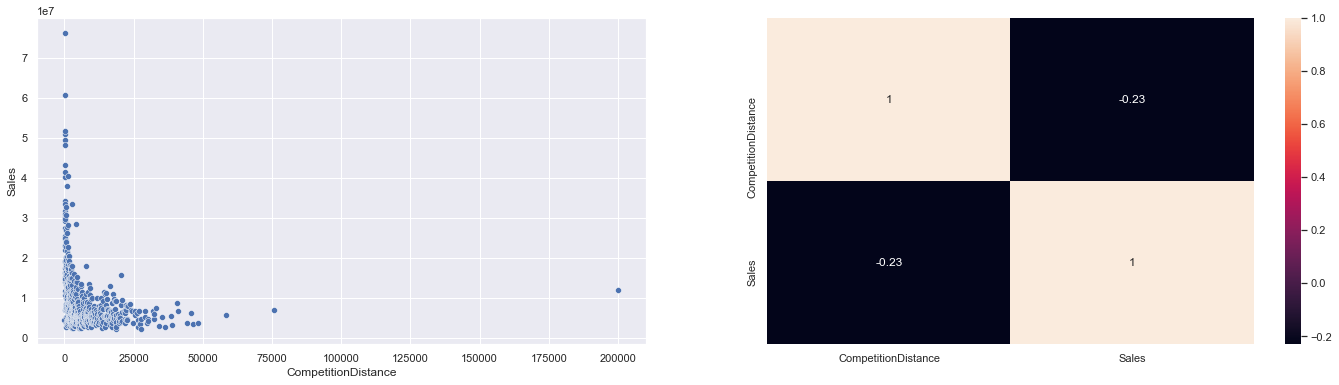

In [25]:
aux1 = dfRaw1[['CompetitionDistance', 'Sales']].groupby('CompetitionDistance').sum().reset_index()

plt.figure(figsize = (24, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='CompetitionDistance', y='Sales', data=aux1)

plt.subplot(1, 2, 2)
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H3-Stores with longer competitors should sell more
**FALSE** Stores with longer competitors sell **LESS**

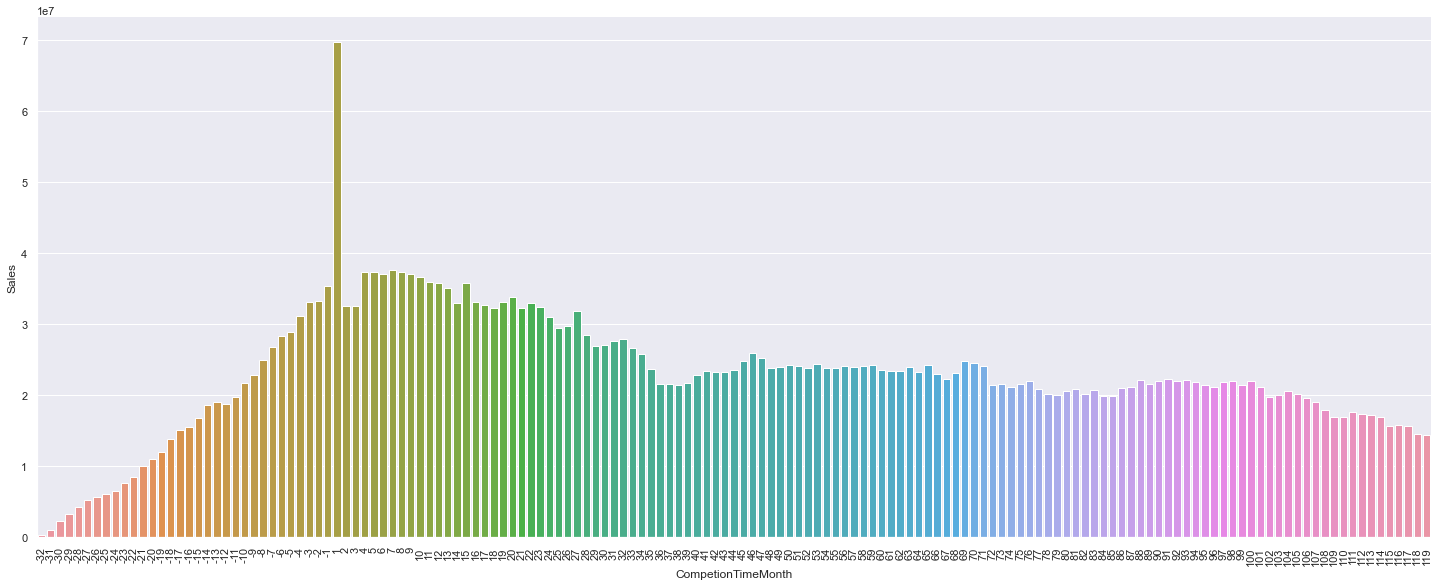

In [26]:
aux1 = dfRaw1[['CompetionTimeMonth', 'Sales']].groupby('CompetionTimeMonth').sum().reset_index()
aux2 = aux1[(aux1['CompetionTimeMonth'] < 120) & (aux1['CompetionTimeMonth'] != 0)]
sns.catplot(x='CompetionTimeMonth', y='Sales', data=aux2, kind='bar', height=8, aspect=2.5);
plt.xticks(rotation=90)
plt.show()

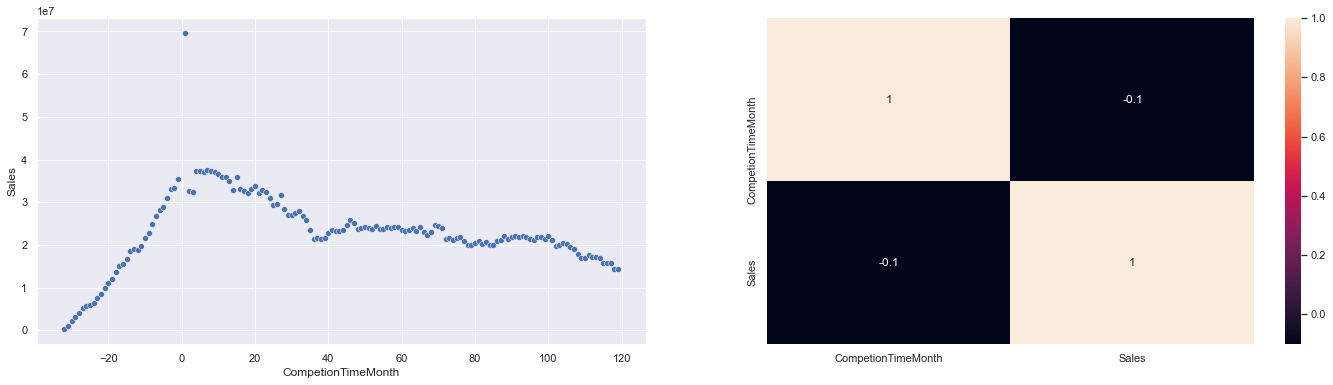

In [27]:
aux1 = dfRaw1[['CompetionTimeMonth', 'Sales']].groupby('CompetionTimeMonth').sum().reset_index()
aux2 = aux1[(aux1['CompetionTimeMonth'] < 120) & (aux1['CompetionTimeMonth'] != 0)]

plt.figure(figsize = (24, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='CompetionTimeMonth', y='Sales', data=aux2)

plt.subplot(1, 2, 2)
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H4-Stores with active promotions for longer should sell more
**FALSE** Stores with active promotions for longer sell **LESS**

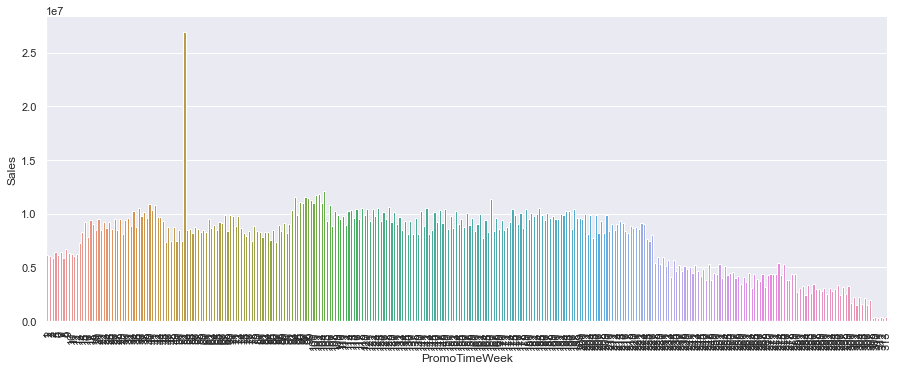

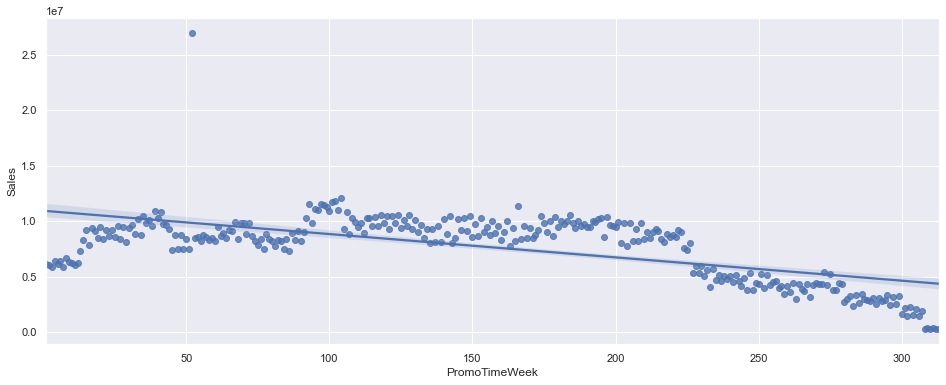

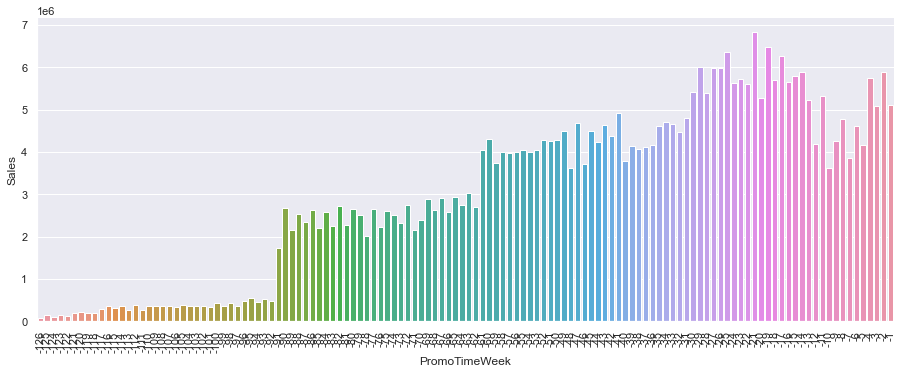

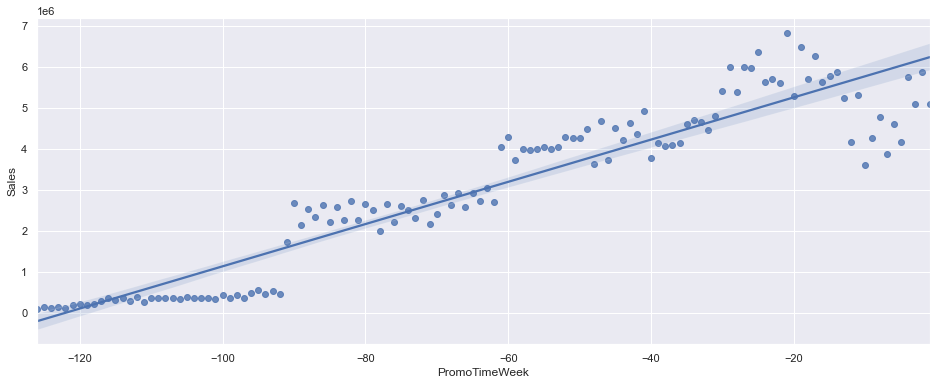

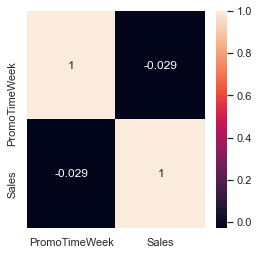

In [40]:
aux1 = dfRaw1[['PromoTimeWeek', 'Sales']].groupby('PromoTimeWeek').sum().reset_index()

aux2 = aux1[aux1['PromoTimeWeek'] > 0] #Promo Extended
sns.catplot(x='PromoTimeWeek', y='Sales', data=aux2, kind='bar', height=5, aspect=2.5);
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,6))
sns.regplot(x='PromoTimeWeek', y='Sales', data=aux2);
plt.show()

aux3 = aux1[aux1['PromoTimeWeek'] < 0] #Promo Regular
sns.catplot(x='PromoTimeWeek', y='Sales', data=aux3, kind='bar', height=5, aspect=2.5);
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,6))
sns.regplot(x='PromoTimeWeek', y='Sales', data=aux3);
plt.show()

plt.figure(figsize=(4,4))
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### ~~H5-Stores with more days of promotion should sell more~~

#### H6-Stores with consecutive promotions should sell more
**FALSE** Stores with consecutive promotions sell **LESS**

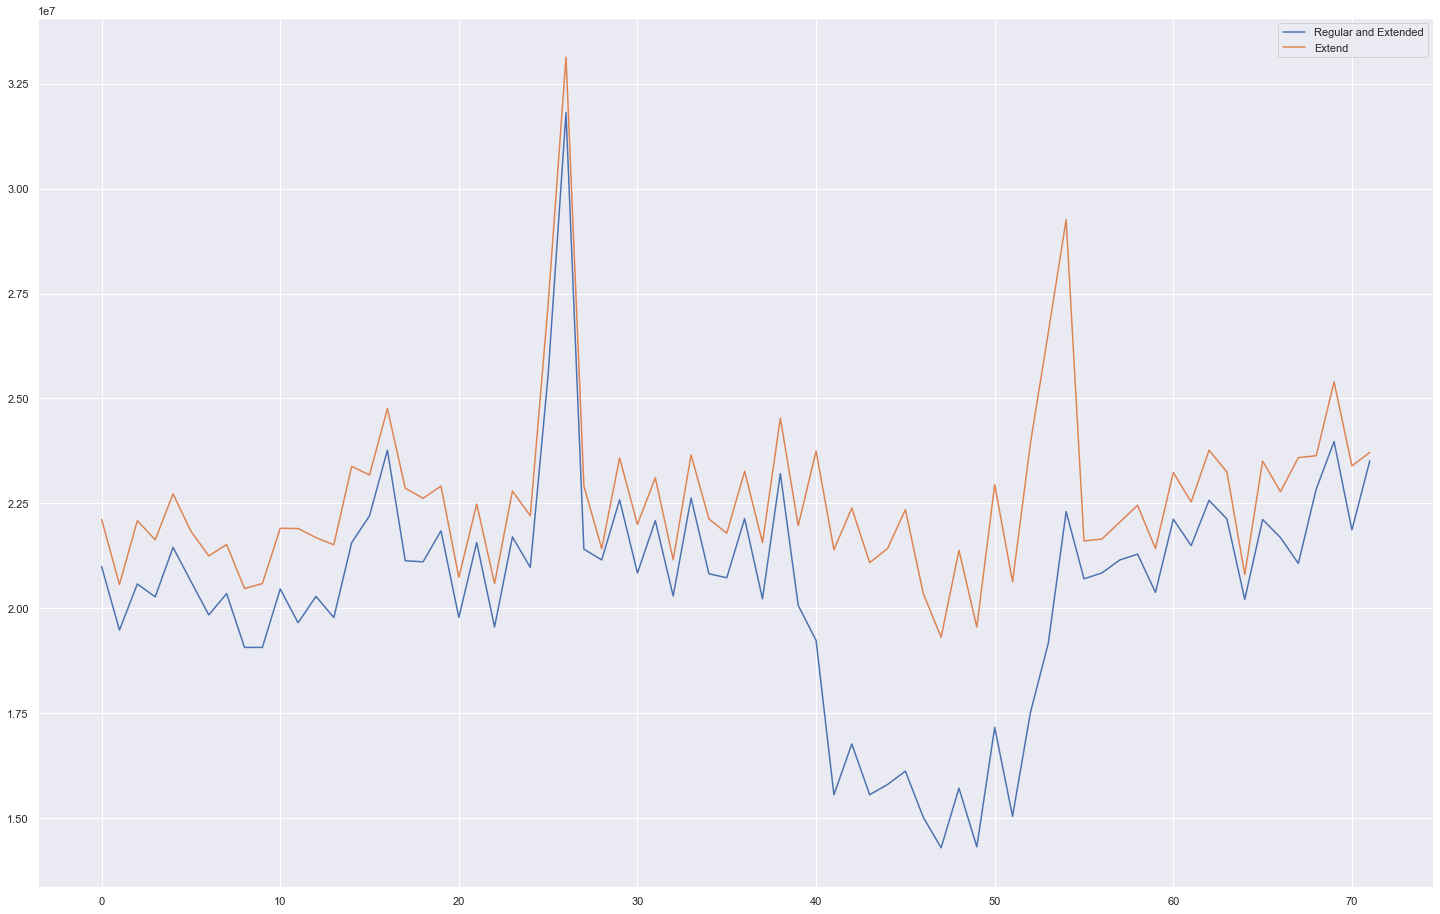

In [29]:
aux1 = dfRaw1[(dfRaw1['Promo'] == 1) & (dfRaw1['Promo2'] == 1)][['YearWeek', 'Sales']].groupby('YearWeek').sum().reset_index()
ax = aux1.plot()

aux2 = dfRaw1[(dfRaw1['Promo'] == 1) & (dfRaw1['Promo2'] == 0)][['YearWeek', 'Sales']].groupby('YearWeek').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['Regular and Extended', 'Extend'])

plt.show()

#### H7-Stores should sell more in the second semester
**FALSE** Stores sell **LESS** in the second semester

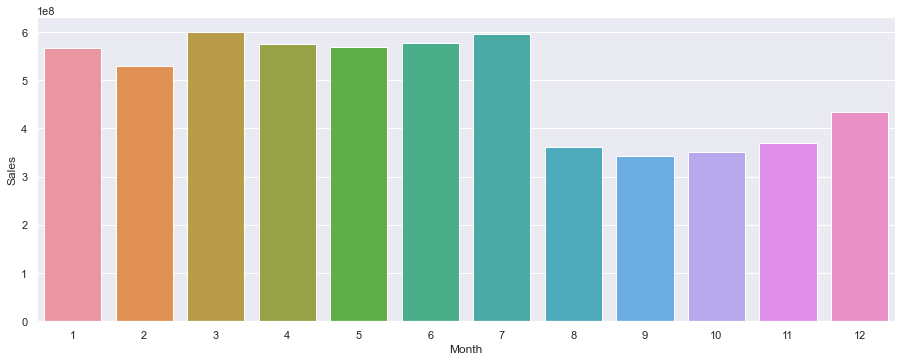

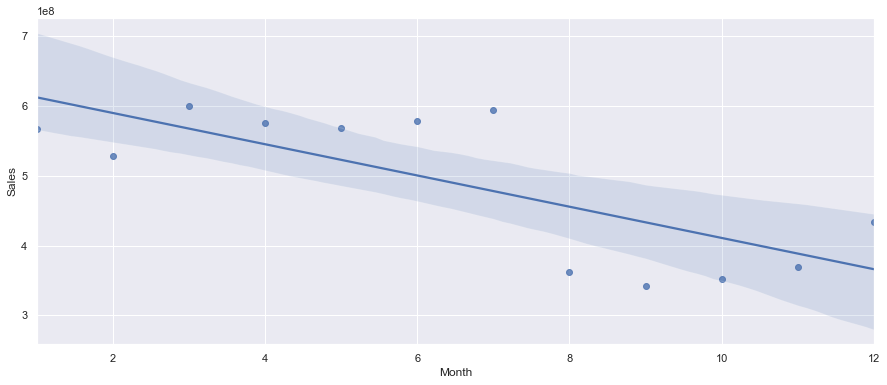

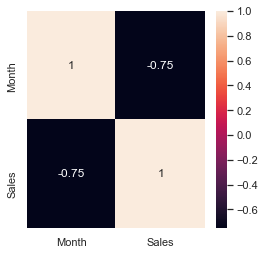

In [41]:
aux1 = dfRaw1[['Month', 'Sales']].groupby('Month').sum().reset_index()
sns.catplot(x='Month', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()


plt.figure(figsize=(15,6))
sns.regplot(x='Month', y='Sales', data=aux1);
plt.show()

plt.figure(figsize=(4,4))
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H8-Stores should sell less on weekends
**TRUE** Stores sell **LESS** on weekends

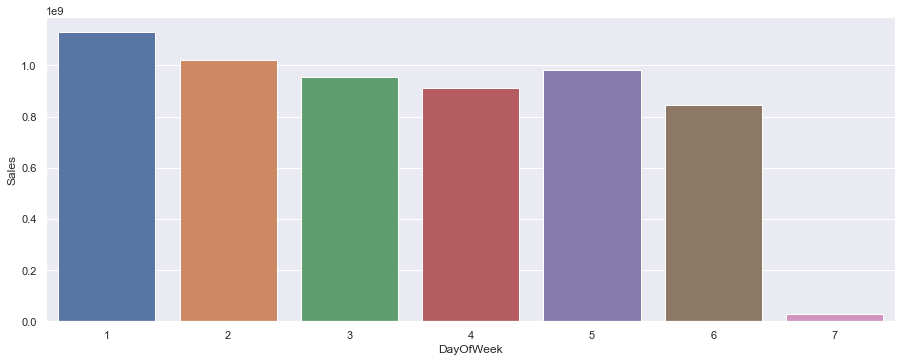

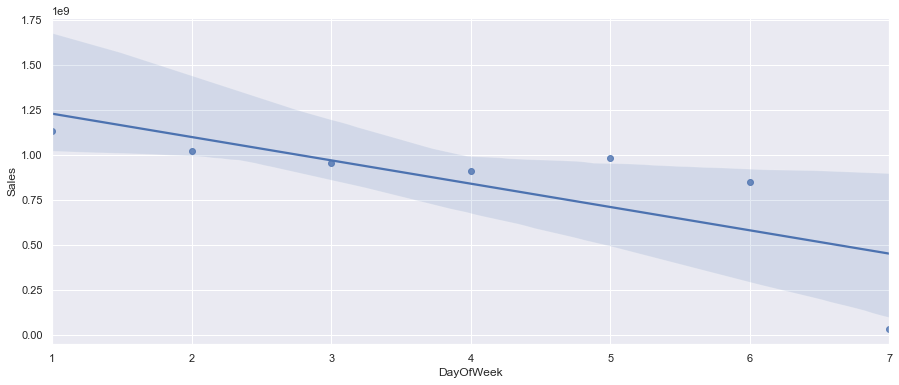

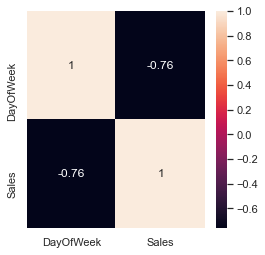

In [42]:
aux1 = dfRaw1[['DayOfWeek', 'Sales']].groupby('DayOfWeek').sum().reset_index()
sns.catplot(x='DayOfWeek', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()


plt.figure(figsize=(15,6))
sns.regplot(x='DayOfWeek', y='Sales', data=aux1);
plt.show()

plt.figure(figsize=(4,4))
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H9-Stores open during the Christmas holiday should sell more
**FALSE** Stores open during the Christmas holiday sell **LESS**

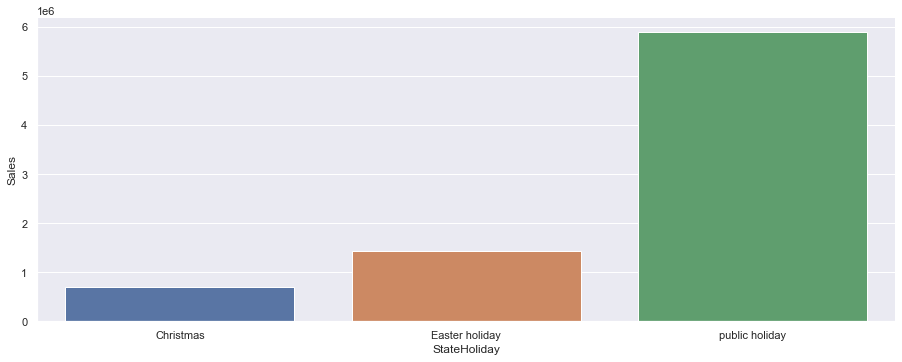

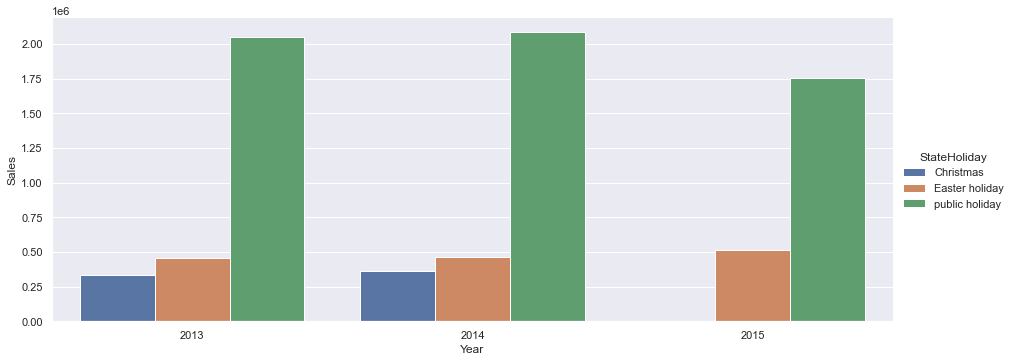

In [32]:
aux = dfRaw1[dfRaw1['StateHoliday'] != 'Regular Day']
aux1 = aux[['StateHoliday', 'Sales']].groupby('StateHoliday').sum().reset_index()
sns.catplot(x='StateHoliday', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()

aux1 = aux[['Year', 'StateHoliday', 'Sales']].groupby(['Year', 'StateHoliday']).sum().reset_index()
sns.catplot(x='Year', y='Sales', data=aux1, kind='bar', hue='StateHoliday', height=5, aspect=2.5);
plt.show()

#### H10-Stores should sell more over the years
**FALSE** Stores sell **LESS** over the years

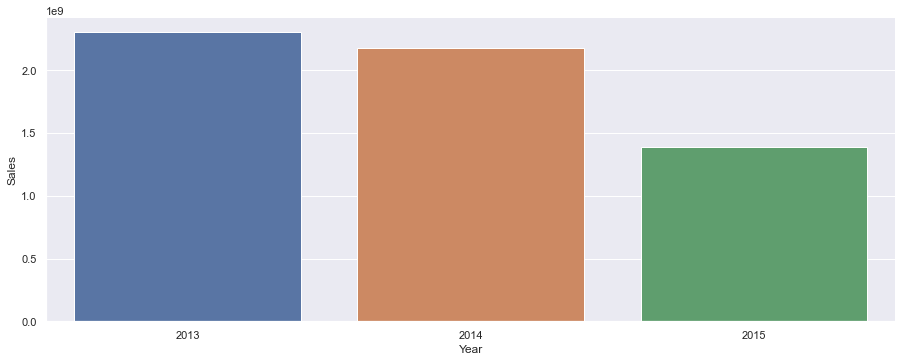

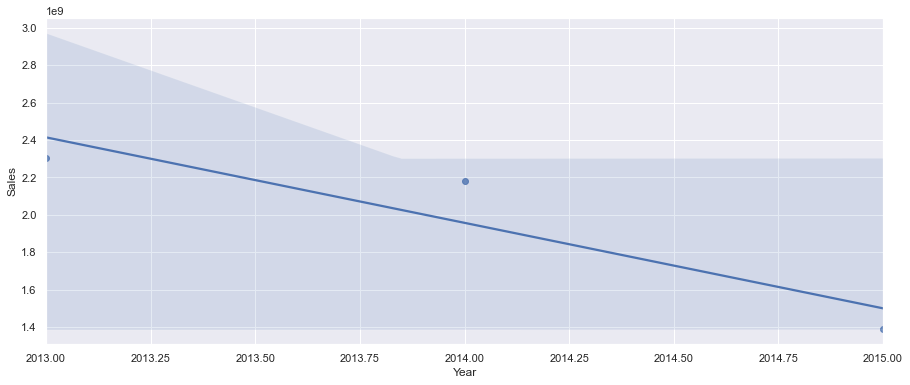

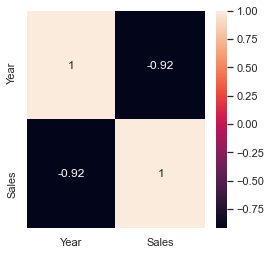

In [43]:
aux1 = dfRaw1[['Year', 'Sales']].groupby('Year').sum().reset_index()
sns.catplot(x='Year', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()


plt.figure(figsize=(15,6))
sns.regplot(x='Year', y='Sales', data=aux1);
plt.show()

plt.figure(figsize=(4,4))
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H11-Stores should sell more after the 10th of each month
**TRUE** Stores sell **MORE** after the 10th of each month

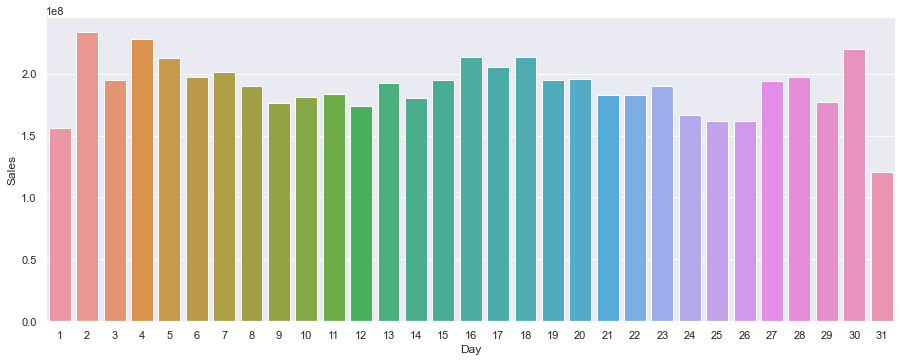

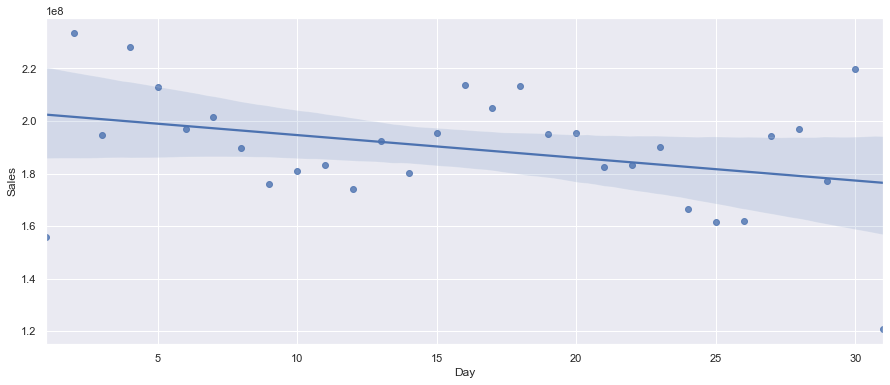

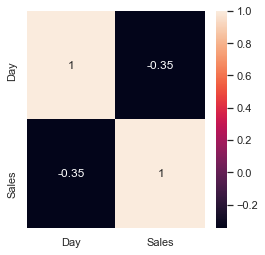

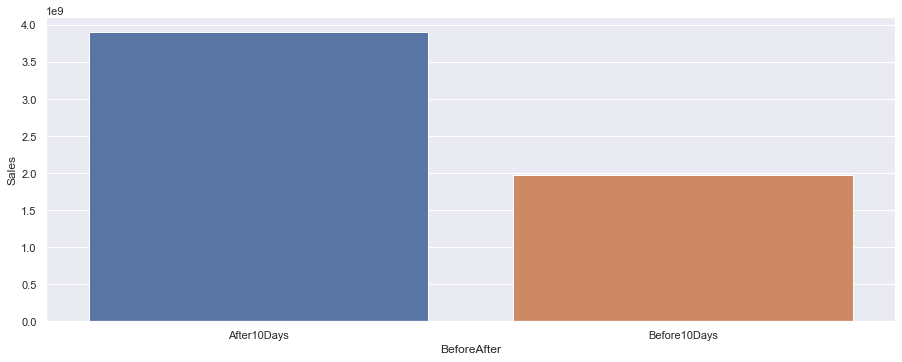

In [44]:
aux1 = dfRaw1[['Day', 'Sales']].groupby('Day').sum().reset_index()
sns.catplot(x='Day', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()


plt.figure(figsize=(15,6))
sns.regplot(x='Day', y='Sales', data=aux1);
plt.show()

plt.figure(figsize=(4,4))
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

aux1['BeforeAfter'] = aux1['Day'].apply(lambda row: 'Before10Days' if row <= 10 else 'After10Days')
aux2 = aux1[['BeforeAfter', 'Sales']].groupby('BeforeAfter').sum().reset_index()
sns.catplot(x='BeforeAfter', y='Sales', data=aux2, kind='bar', height=5, aspect=2.5);
plt.show()

#### H12-Stores should sell less during school holidays
**TRUE** Stores sell **LESS** during school holidays, **except July and August**

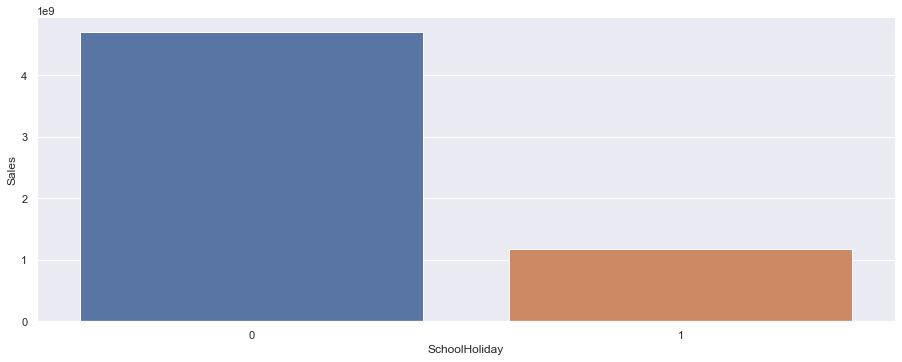

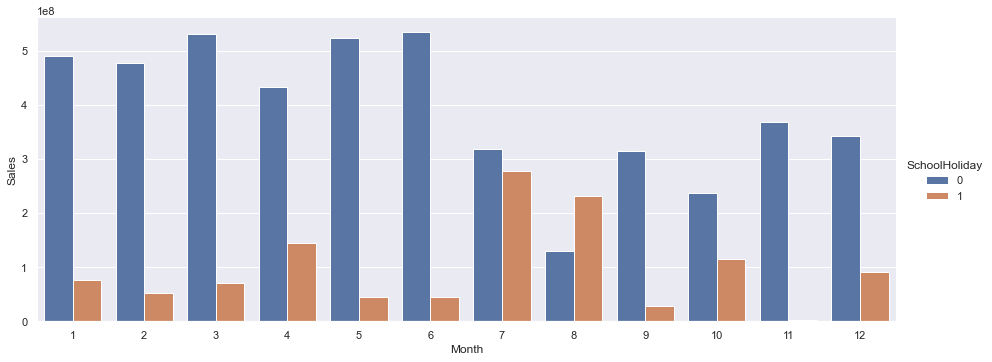

In [35]:
aux1 = dfRaw1[['SchoolHoliday', 'Sales']].groupby('SchoolHoliday').sum().reset_index()
sns.catplot(x='SchoolHoliday', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()


aux2 = dfRaw1[['Month', 'SchoolHoliday', 'Sales']].groupby(['Month', 'SchoolHoliday']).sum().reset_index()
sns.catplot(x='Month', y='Sales', data=aux2, kind='bar', hue='SchoolHoliday', height=5, aspect=2.5);
plt.show()

In [36]:
tab =[['Hypothesis', 'Conclusion', 'Relevance'],
      ['H1', 'False', 'Low'],  
      ['H2', 'False', 'Medium'],  
      ['H3', 'False', 'Medium'],
      ['H4', 'False', 'Low'],
      ['H5', '-', '-'],
      ['H6', 'False', 'Low'],
      ['H7', 'False', 'Hight'],
      ['H8', 'True', 'Hight'],
      ['H9', 'False', 'Medium'],
      ['H10', 'False', 'Hight'],
      ['H11', 'True', 'Hight'],
      ['H12', 'True', 'Low'], 
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            False         Low
H2            False         Medium
H3            False         Medium
H4            False         Low
H5            -             -
H6            False         Low
H7            False         Hight
H8            True          Hight
H9            False         Medium
H10           False         Hight
H11           True          Hight
H12           True          Low


### Multivariate Analysis

#### Numerical Attributes

In [37]:
numAttributes = dfRaw1.select_dtypes(include=['int64', 'float64'])

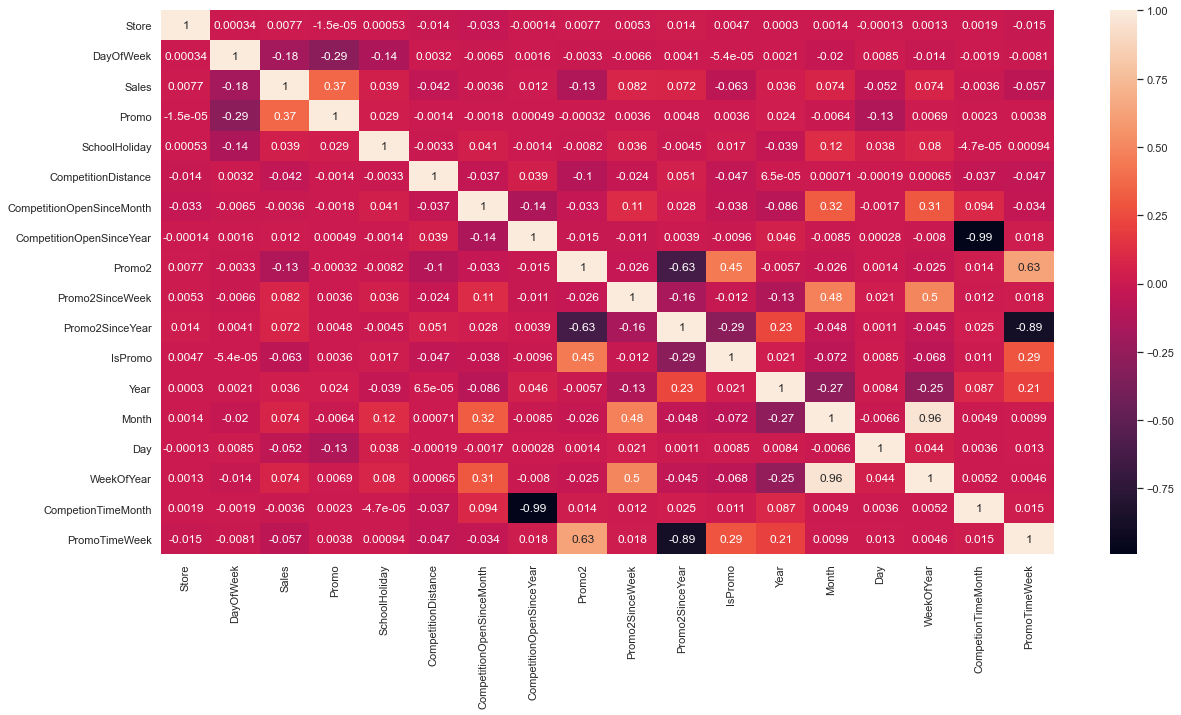

In [38]:
correlation = numAttributes.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)
plt.show()

#### Categorical Attributes

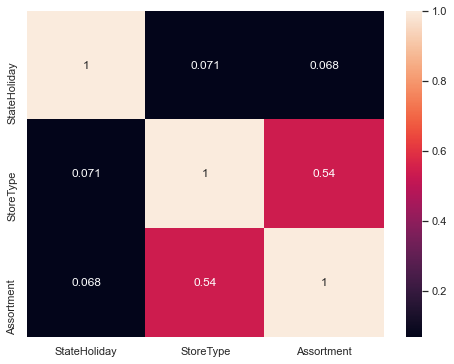

In [83]:
#Only Categorical Data
catAttributes = dfRaw1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

#Calculate Cramer V
a1 = cramerV(catAttributes['StateHoliday'], catAttributes['StateHoliday'])
a2 = cramerV(catAttributes['StateHoliday'], catAttributes['StoreType'])
a3 = cramerV(catAttributes['StateHoliday'], catAttributes['Assortment'])

a4 = cramerV(catAttributes['StoreType'], catAttributes['StateHoliday'])
a5 = cramerV(catAttributes['StoreType'], catAttributes['StoreType'])
a6 = cramerV(catAttributes['StoreType'], catAttributes['Assortment'])

a7 = cramerV(catAttributes['Assortment'], catAttributes['StateHoliday'])
a8 = cramerV(catAttributes['Assortment'], catAttributes['StoreType'])
a9 = cramerV(catAttributes['Assortment'], catAttributes['Assortment'])

#Final Dataset
dictCramerV = {
                'StateHoliday':[a1, a2, a3],
                'StoreType':[a4, a5, a6],
                'Assortment':[a7, a8, a9]
                }

d = pd.DataFrame(dictCramerV)

d = d.set_index(d.columns)

#HeatMap Plot
plt.figure(figsize=(8,6))
sns.heatmap(d, annot=True)
plt.show()